<a href="https://colab.research.google.com/github/fukmats/ml/blob/main/notebook_B(matsuyama).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI課題用ノートブック

このノートブックは、穴埋め形式になっています。ヒントに従って適切なコードを挿入していくことによって、データの前処理、AIモデルの学習、テストを行うことができます。

このノートブックは、以下のような流れで構成されています。

1. ライブラリのインポート
2. データの読み込み
3. データの整理・結合
4. 前処理
5. モデリング
6. モデルの評価
7. 追加課題（任意）


# 下準備

### Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ライブラリのインポート

In [2]:
# numpy,pandas
import numpy as np
import pandas as pd

# scikit-learnのランダムフォレストモデル(あくまで一例)
from sklearn.ensemble import RandomForestClassifier


# 評価指標
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score

In [3]:
#出力列を全件表示させる設定
pd.set_option('display.max_columns',None)
np.set_printoptions(threshold=np.inf)

### データの読み込み

In [4]:
# データセットのパス
dataset_path = '/content/drive/MyDrive/AI_Quest_2022/coding/'

# pandasのread_csv関数を用いて、csvファイルからデータフレームを作成
train = pd.read_csv(dataset_path + 'train.csv')
test = pd.read_csv(dataset_path + "test.csv")
coupon = pd.read_csv(dataset_path + 'coupon.csv')
customer = pd.read_csv(dataset_path + "customer.csv")
purchase = pd.read_csv(dataset_path + "purchase_history.csv")

### 各データの情報表示

In [5]:
# 学習用のデータセットを表示
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   顧客ID    3916 non-null   int64
 1   クーポンID  3916 non-null   int64
 2   クーポン利用  3916 non-null   int64
dtypes: int64(3)
memory usage: 91.9 KB


,顧客ID,クーポンID,クーポン利用
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
3911,356,7,0
3912,356,8,0
3913,356,9,0
3914,356,10,0


In [6]:
# テスト用のデータを表示（最終的にこのデータに対して、クーポンの利用確率を予測する）
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   顧客ID    3916 non-null   int64
 1   クーポンID  3916 non-null   int64
dtypes: int64(2)
memory usage: 61.3 KB


,顧客ID,クーポンID
0,357,1
1,357,2
2,357,3
3,357,4
4,357,5
...,...,...
3911,712,7
3912,712,8
3913,712,9
3914,712,10


In [7]:
# クーポン情報（クーポンIDとクーポンを使用できる商品カテゴリの対応）を表示
coupon.info()
coupon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   クーポンID    11 non-null     int64 
 1   商品カテゴリID  11 non-null     object
 2   商品カテゴリ    11 non-null     object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


,クーポンID,商品カテゴリID,商品カテゴリ
0,1,c1,米・パン
1,2,c2,肉
2,3,c3,海鮮
3,4,c4,自然食品
4,5,c5,即席食品
5,6,c6,惣菜
6,7,c7,飲料
7,8,c8,食料品その他
8,9,c9,医薬品類
9,10,c10,スキンケア・ヘアケア


In [8]:
# 顧客の属性情報を表示
# "年齢層"～"子供人数"まではobject型（文字列）であることに注意
customer.info()
customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   顧客ID    712 non-null    int64 
 1   年齢層     712 non-null    object
 2   既婚・独身   377 non-null    object
 3   家族人数    712 non-null    object
 4   子供人数    184 non-null    object
 5   持家      712 non-null    int64 
 6   年収レベル   712 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 39.1+ KB


,顧客ID,年齢層,既婚・独身,家族人数,子供人数,持家,年収レベル
0,1,40-49,NaN,1,NaN,0,5
1,2,70+,NaN,1,NaN,0,5
2,3,40-49,独身,5+,3+,0,2
3,4,50-59,既婚,5+,3+,0,9
4,5,20-29,NaN,2,NaN,0,4
...,...,...,...,...,...,...,...
707,708,60-69,既婚,2,NaN,0,2
708,709,60-69,既婚,2,NaN,0,5
709,710,50-59,NaN,2,NaN,0,6
710,711,50-59,NaN,1,NaN,0,10


In [9]:
# 各顧客の直近2ヶ月の購買履歴を表示 
# ※c1=クーポン1, c2=クーポン2, ... c11=クーポン11を表し、クーポンの商品カテゴリ別の購入回数、購入商品数、クーポン割引金額、購入金額の情報が含まれる
# ※「経過日数」は前回の来店から経過した日数を表す
purchase.info()
purchase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   顧客ID        712 non-null    int64
 1   c1_購入回数     712 non-null    int64
 2   c1_購入商品数    712 non-null    int64
 3   c1_クーポン割引   712 non-null    int64
 4   c1_購入金額     712 non-null    int64
 5   c2_購入回数     712 non-null    int64
 6   c2_購入商品数    712 non-null    int64
 7   c2_クーポン割引   712 non-null    int64
 8   c2_購入金額     712 non-null    int64
 9   c3_購入回数     712 non-null    int64
 10  c3_購入商品数    712 non-null    int64
 11  c3_クーポン割引   712 non-null    int64
 12  c3_購入金額     712 non-null    int64
 13  c4_購入回数     712 non-null    int64
 14  c4_購入商品数    712 non-null    int64
 15  c4_クーポン割引   712 non-null    int64
 16  c4_購入金額     712 non-null    int64
 17  c5_購入回数     712 non-null    int64
 18  c5_購入商品数    712 non-null    int64
 19  c5_クーポン割引   712 non-null    int64
 20  c5_購入金額     712 non-null    int6

,顧客ID,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額
0,1,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
1,2,0,0,0,0,10,10,0,4278,4,5,0,2311,5,18,0,1104,8,9,-178,5423,0,0,0,0,8,13,0,3866,13,87,0,14527,13,18,0,5804,0,0,0,0,0,0,0,0,13,6,37313
2,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,407,0,0,0,0,0,0,0,0,0,0,0,0,13,26,0,7986,13,39,-489,38665,0,0,0,0,0,0,0,0,13,8,47058
3,4,2,3,0,886,2,2,0,1684,2,2,0,2133,9,9,0,4616,13,19,0,9471,7,8,0,3921,3,3,0,1576,14,150,-445,73174,14,40,0,24308,1,1,0,746,0,0,0,0,14,27,122515
4,5,1,1,0,267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,712,6,40,-178,18372,3,3,-267,3380,2,2,0,1519,0,0,0,0,6,48,24250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,708,1,1,0,354,0,0,0,0,1,1,0,1066,7,8,0,3360,2,2,0,1688,1,1,0,710,1,1,0,443,14,59,0,29945,5,6,0,3198,0,0,0,0,4,4,0,5464,14,7,46228
708,709,15,15,0,5519,2,2,0,1401,0,0,0,0,9,17,0,3875,3,3,0,1900,3,3,0,2716,22,33,0,15982,22,116,0,46681,9,13,0,5095,0,0,0,0,2,2,0,2669,22,3,85838
709,710,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1022,0,0,0,0,0,0,0,0,1,1,0,297,1,3,0,528,1,2,0,1367,0,0,0,0,0,0,0,0,1,58,3214
710,711,11,16,0,2935,2,4,0,1544,5,7,0,3670,5,8,0,2844,27,36,-267,15886,9,9,0,4578,10,24,0,3451,50,585,-1754,184915,50,108,-178,47135,1,1,0,1155,2,2,0,3025,50,1,271138


# AI課題1：データの整理・結合

## 1-1. trainと顧客属性, 購買履歴データを結合する
ヒント：pd.merge()を用いて、顧客IDをキーとした結合を行う

In [10]:
# 1-1: ここにコードを記入
merge_train = pd.merge(train,customer,on="顧客ID")
merge_train = pd.merge(merge_train,purchase,on="顧客ID")
merge_train

,顧客ID,クーポンID,クーポン利用,年齢層,既婚・独身,家族人数,子供人数,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額
0,1,1,0,40-49,NaN,1,NaN,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
1,1,2,0,40-49,NaN,1,NaN,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
2,1,3,0,40-49,NaN,1,NaN,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
3,1,4,0,40-49,NaN,1,NaN,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
4,1,5,0,40-49,NaN,1,NaN,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,356,7,0,50-59,独身,2,NaN,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3912,356,8,0,50-59,独身,2,NaN,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3913,356,9,0,50-59,独身,2,NaN,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3914,356,10,0,50-59,独身,2,NaN,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572


## 1-2. testと顧客属性, 購買履歴データを結合する
ヒント：1-1と同様

In [11]:
# 1-2: ここにコードを記入
merge_test = pd.merge(test,customer,on="顧客ID")
merge_test = pd.merge(merge_test,purchase,on="顧客ID")
merge_test

,顧客ID,クーポンID,年齢層,既婚・独身,家族人数,子供人数,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額
0,357,1,70+,既婚,2,NaN,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
1,357,2,70+,既婚,2,NaN,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
2,357,3,70+,既婚,2,NaN,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
3,357,4,70+,既婚,2,NaN,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
4,357,5,70+,既婚,2,NaN,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,712,7,50-59,NaN,3,1,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3912,712,8,50-59,NaN,3,1,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3913,712,9,50-59,NaN,3,1,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3914,712,10,50-59,NaN,3,1,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545


## <font color="Red">※ （③ AI課題1：【データの整理】）の目標ここまで</font>

（余裕があれば先に進めてもかまいません）

---

# AI課題2：前処理

### 2-1. 欠損値を処理する
データフレームでNaNと表示されてしまう部分(欠損値)を別の値で補完しましょう。<br>
ヒント：df.fillna()を用いて、平均値か最頻値で補完する

In [12]:
# 欠損値の置き換え
# TODO　最頻値でも試す
# merge_train = merge_train.fillna({'既婚・独身':'その他','子供人数':0})
merge_train = merge_train.dropna(how='any', axis=1)

In [13]:
merge_train

,顧客ID,クーポンID,クーポン利用,年齢層,家族人数,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額
0,1,1,0,40-49,1,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
1,1,2,0,40-49,1,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
2,1,3,0,40-49,1,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
3,1,4,0,40-49,1,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
4,1,5,0,40-49,1,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,356,7,0,50-59,2,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3912,356,8,0,50-59,2,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3913,356,9,0,50-59,2,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572
3914,356,10,0,50-59,2,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572


In [14]:
# merge_test = merge_test.fillna({'既婚・独身':'その他','子供人数':0})
merge_test = merge_test.dropna(how='any', axis=1)

In [15]:
merge_test

,顧客ID,クーポンID,年齢層,家族人数,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額
0,357,1,70+,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
1,357,2,70+,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
2,357,3,70+,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
3,357,4,70+,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
4,357,5,70+,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,712,7,50-59,3,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3912,712,8,50-59,3,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3913,712,9,50-59,3,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545
3914,712,10,50-59,3,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545


In [16]:
# 欠損値の残存チェック
merge_train.isnull().any()


顧客ID          False
クーポンID        False
クーポン利用        False
年齢層           False
家族人数          False
持家            False
年収レベル         False
c1_購入回数       False
c1_購入商品数      False
c1_クーポン割引     False
c1_購入金額       False
c2_購入回数       False
c2_購入商品数      False
c2_クーポン割引     False
c2_購入金額       False
c3_購入回数       False
c3_購入商品数      False
c3_クーポン割引     False
c3_購入金額       False
c4_購入回数       False
c4_購入商品数      False
c4_クーポン割引     False
c4_購入金額       False
c5_購入回数       False
c5_購入商品数      False
c5_クーポン割引     False
c5_購入金額       False
c6_購入回数       False
c6_購入商品数      False
c6_クーポン割引     False
c6_購入金額       False
c7_購入回数       False
c7_購入商品数      False
c7_クーポン割引     False
c7_購入金額       False
c8_購入回数       False
c8_購入商品数      False
c8_クーポン割引     False
c8_購入金額       False
c9_購入回数       False
c9_購入商品数      False
c9_クーポン割引     False
c9_購入金額       False
c10_購入回数      False
c10_購入商品数     False
c10_クーポン割引    False
c10_購入金額      False
c11_購入回数      False
c11_購入商品数     False
c11_クーポン割引    False


In [17]:
merge_test.isnull().any()

顧客ID          False
クーポンID        False
年齢層           False
家族人数          False
持家            False
年収レベル         False
c1_購入回数       False
c1_購入商品数      False
c1_クーポン割引     False
c1_購入金額       False
c2_購入回数       False
c2_購入商品数      False
c2_クーポン割引     False
c2_購入金額       False
c3_購入回数       False
c3_購入商品数      False
c3_クーポン割引     False
c3_購入金額       False
c4_購入回数       False
c4_購入商品数      False
c4_クーポン割引     False
c4_購入金額       False
c5_購入回数       False
c5_購入商品数      False
c5_クーポン割引     False
c5_購入金額       False
c6_購入回数       False
c6_購入商品数      False
c6_クーポン割引     False
c6_購入金額       False
c7_購入回数       False
c7_購入商品数      False
c7_クーポン割引     False
c7_購入金額       False
c8_購入回数       False
c8_購入商品数      False
c8_クーポン割引     False
c8_購入金額       False
c9_購入回数       False
c9_購入商品数      False
c9_クーポン割引     False
c9_購入金額       False
c10_購入回数      False
c10_購入商品数     False
c10_クーポン割引    False
c10_購入金額      False
c11_購入回数      False
c11_購入商品数     False
c11_クーポン割引    False
c11_購入金額      False


### 2-2. カテゴリ変数をダミー変数化する
"年齢層"や"家族人数"はObject型（文字列）で数値として扱えないため、「0」「1」だけの数列に変換しましょう<br>
ヒント：pd.get_dummies()を用いる

In [18]:
#年齢層と家族人数のダミー変数化(train用)
#merge_train = pd.get_dummies(merge_train,columns=['年齢層','家族人数','既婚・独身','子供人数'])
merge_train = pd.get_dummies(merge_train,columns=['年齢層','家族人数'])


In [19]:
#trainデータ中身確認
merge_train

,顧客ID,クーポンID,クーポン利用,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額,年齢層_20-29,年齢層_30-39,年齢層_40-49,年齢層_50-59,年齢層_60-69,年齢層_70+,家族人数_1,家族人数_2,家族人数_3,家族人数_4,家族人数_5+
0,1,1,0,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562,0,0,1,0,0,0,1,0,0,0,0
1,1,2,0,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562,0,0,1,0,0,0,1,0,0,0,0
2,1,3,0,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562,0,0,1,0,0,0,1,0,0,0,0
3,1,4,0,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562,0,0,1,0,0,0,1,0,0,0,0
4,1,5,0,0,5,1,2,0,534,1,2,0,2803,0,0,0,0,1,1,0,764,9,17,0,4981,0,0,0,0,0,0,0,0,9,77,0,22620,9,10,0,24860,0,0,0,0,0,0,0,0,9,19,56562,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,356,7,0,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572,0,0,0,1,0,0,0,1,0,0,0
3912,356,8,0,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572,0,0,0,1,0,0,0,1,0,0,0
3913,356,9,0,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572,0,0,0,1,0,0,0,1,0,0,0
3914,356,10,0,0,4,1,2,0,178,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1512,0,0,0,0,2,2,0,1100,6,16,0,6114,2,3,0,1011,1,1,0,657,0,0,0,0,6,12,10572,0,0,0,1,0,0,0,1,0,0,0


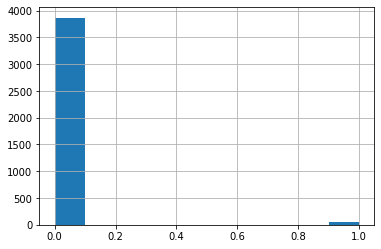

In [20]:
merge_train["クーポン利用"].hist()

In [21]:
#年齢層と家族人数のダミー変数化(teat用)
#merge_test = pd.get_dummies(merge_test,columns=['年齢層','家族人数','既婚・独身','子供人数'])
merge_test = pd.get_dummies(merge_test,columns=['年齢層','家族人数'])


In [22]:
#testデータ中身確認
merge_test

,顧客ID,クーポンID,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額,年齢層_20-29,年齢層_30-39,年齢層_40-49,年齢層_50-59,年齢層_60-69,年齢層_70+,家族人数_1,家族人数_2,家族人数_3,家族人数_4,家族人数_5+
0,357,1,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
1,357,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
2,357,3,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
3,357,4,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
4,357,5,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,712,7,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3912,712,8,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3913,712,9,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3914,712,10,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0


### 2-3. 説明変数・目的変数を用意する
X_train：学習用の説明変数（"train.csv"を加工したもの）<br>
Y_train：学習用の目的変数（"train.csv"の「クーポン利用」）<br>
X_test ：評価用の説明変数（"test.csv"を加工したもの）<br>
Y_test ：評価用の目的変数（ここでは用意せず、後にanswer.csvから読み込む）

In [23]:
# 2-3: ここにコードを記入
X_train = merge_train.copy()
Y_train = merge_train['クーポン利用'].copy()
X_test = merge_test.copy()

In [24]:
X_test

,顧客ID,クーポンID,持家,年収レベル,c1_購入回数,c1_購入商品数,c1_クーポン割引,c1_購入金額,c2_購入回数,c2_購入商品数,c2_クーポン割引,c2_購入金額,c3_購入回数,c3_購入商品数,c3_クーポン割引,c3_購入金額,c4_購入回数,c4_購入商品数,c4_クーポン割引,c4_購入金額,c5_購入回数,c5_購入商品数,c5_クーポン割引,c5_購入金額,c6_購入回数,c6_購入商品数,c6_クーポン割引,c6_購入金額,c7_購入回数,c7_購入商品数,c7_クーポン割引,c7_購入金額,c8_購入回数,c8_購入商品数,c8_クーポン割引,c8_購入金額,c9_購入回数,c9_購入商品数,c9_クーポン割引,c9_購入金額,c10_購入回数,c10_購入商品数,c10_クーポン割引,c10_購入金額,c11_購入回数,c11_購入商品数,c11_クーポン割引,c11_購入金額,来店頻度,経過日数,総購入金額,年齢層_20-29,年齢層_30-39,年齢層_40-49,年齢層_50-59,年齢層_60-69,年齢層_70+,家族人数_1,家族人数_2,家族人数_3,家族人数_4,家族人数_5+
0,357,1,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
1,357,2,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
2,357,3,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
3,357,4,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
4,357,5,0,4,3,5,0,1606,0,0,0,0,0,0,0,0,1,1,0,356,6,18,-97,8539,3,3,0,1704,3,3,0,1314,6,143,-1496,56020,6,19,-222,6812,0,0,0,0,0,0,0,0,6,12,76351,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,712,7,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3912,712,8,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3913,712,9,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0
3914,712,10,0,9,2,2,0,1207,0,0,0,0,0,0,0,0,3,7,0,2840,1,1,0,1066,2,2,0,708,0,0,0,0,3,40,0,14513,1,2,0,211,0,0,0,0,0,0,0,0,3,54,20545,0,0,0,1,0,0,0,0,1,0,0


In [25]:
#X_trainから'クーポン利用'を削除
X_train = X_train.drop('クーポン利用',axis=1)

## <font color="Red">※ （④ AI課題2：【前処理】）の目標ここまで</font>

（余裕があれば先に進めてもかまいません）

---

# AI課題3：モデリング

### 3-1. 任意のモデルを選択、学習する
scikit-learnの分類モデルから好きなものを選択し、学習を行いましょう<br>
ヒント：model.fit()を使用

In [26]:
# 参考
# https://blog.amedama.jp/entry/imbalanced-data
weights = {
   0: 1 / (len(Y_train[Y_train == 0]) / len(Y_train)),
   1: 1 / (len(Y_train[Y_train == 1]) / len(Y_train)),
}

In [27]:
# 3-1: ここにコードを記入
clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight=weights)
clf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1.0126713214378071,
                                     1: 79.91836734693877},
                       max_depth=2, random_state=0)

### 3-2. 学習済みのモデルを使用してテストデータに関する予測値（予測確率）を算出する
ヒント：model.predict_proba()を利用

In [28]:
# 3-2: ここにコードを記入
#各人の確率
predict = clf.predict_proba(X_test)

# AI課題4：提出用ファイルの作成
提出の必要はありませんが、pandasの練習もかねて、スライド通りに提出用ファイル「my_submission.csv」を作成してみましょう。

### 4-1. 顧客ID/クーポンIDごとに予測値（予測確率）の値を並べる

In [29]:
# 4-1: ここにコードを記入
X_test_submit = X_test[["顧客ID","クーポンID"]]
predict_submit = predict[:, 1:2]
X_test_submit["予測値"] = predict_submit
X_test_submit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,顧客ID,クーポンID,予測値
0,357,1,0.251138
1,357,2,0.251138
2,357,3,0.251138
3,357,4,0.251138
4,357,5,0.251138
...,...,...,...
3911,712,7,0.172876
3912,712,8,0.177857
3913,712,9,0.177857
3914,712,10,0.177857


### 4-2. 顧客ID × クーポンID（11列）の表になるように並び替える
ここで作成するデータフレームの変数名は"submit_pivot"としてください。<br>
ヒント：df.pivot()を用いる。


In [30]:
# 4-2: ここにコードを記入
submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")
submit_pivot

クーポンID,1,2,3,4,5,6,7,8,9,10,11
顧客ID,,,,,,,,,,,
357,0.251138,0.251138,0.251138,0.251138,0.251138,0.251138,0.251138,0.287386,0.287386,0.287386,0.287386
358,0.296281,0.291689,0.291689,0.291689,0.291689,0.291689,0.291689,0.318562,0.318562,0.318562,0.318562
359,0.452853,0.448261,0.448261,0.448261,0.448261,0.448261,0.448261,0.494982,0.494982,0.494982,0.494982
360,0.363127,0.363127,0.363127,0.363127,0.363127,0.363127,0.363127,0.397659,0.397659,0.397659,0.397659
361,0.452984,0.452984,0.452984,0.452984,0.452984,0.452984,0.452984,0.500015,0.500015,0.500015,0.500015
...,...,...,...,...,...,...,...,...,...,...,...
708,0.266672,0.266672,0.266672,0.266672,0.266672,0.266672,0.266672,0.301290,0.301290,0.301290,0.301290
709,0.389207,0.389207,0.389207,0.389207,0.389207,0.389207,0.389207,0.432605,0.432605,0.432605,0.432605
710,0.117739,0.113147,0.113147,0.113147,0.113147,0.113147,0.113147,0.121682,0.121682,0.121682,0.121682


In [31]:
# 提出用ファイルの生成
submit_pivot.to_csv("./my_submission.csv", header=None)

### 4-4. モデルの評価
以下のセル内で、モデルの性能を評価します。submit_pivotという名前で予測値のデータフレームを作成した後でこのセルを実行すると、評価指標であるマルチラベルlog lossおよびBalanced Accuracyが出力されます。

In [32]:
# 正解ファイルを読み込み、列数を取得
# ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
num  = len(ans.columns)

# 正解のデータフレームと予測のデータフレームをnumpy配列に変換
ans_array = ans.to_numpy()
submit_array = submit_pivot.to_numpy()

threshold = 0.01 #分類の閾値を設定


from sklearn.metrics import recall_score, precision_score
# 各ラベルにおけるloglossの平均値を計算
sum_logloss = 0
sum_bal_ac = 0
sum_recall = 0
sum_prec = 0
for i in range(num):
    sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
    sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
multi_log_loss = sum_logloss / num
multi_sum_bal_ac = sum_bal_ac / num

print("log loss          : %f" % multi_log_loss)
print("Balanced Accuracy : %f" % multi_sum_bal_ac)

log loss          : 0.433909
Balanced Accuracy : 0.500000


2022/07/01
- 1回目：  
  - log loss          : 0.068530  
  - Balanced Accuracy : 0.616123  
- 2回目(Nanの列を削除してみた):
  - log loss          : 0.068219
  - Balanced Accuracy : 0.611180
- 3回目(重み)
  - log loss          : 0.433909
  - Balanced Accuracy : 0.500000

## ＜追記＞クラスの重みと判定のしきい値を変化させて実験

In [33]:
from sklearn.metrics import recall_score, precision_score
from tqdm import tqdm # プログレスバーを表示
import warnings
warnings.filterwarnings("ignore")

results = [['weights','threshold','log_loss','bal_ac','recall','precision']]

for w in tqdm(range(20,90,5)):
    
      # 参考
      # https://blog.amedama.jp/entry/imbalanced-data
      weights = {
        0: w,
        1: 100-w,
      }
      clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight=weights)
      clf.fit(X_train, Y_train)
      predict = clf.predict_proba(X_test)
      X_test_submit = X_test[["顧客ID","クーポンID"]]
      X_test_submit["予測値"] = predict[:, 1:2]
      submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

      # 正解ファイルを読み込み、列数を取得
      # ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
      ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
      num  = len(ans.columns)

      # 正解のデータフレームと予測のデータフレームをnumpy配列に変換
      ans_array = ans.to_numpy()
      submit_array = submit_pivot.to_numpy()

      # threshold = 0.01 #分類の閾値を設定
      for t in range (1, 50, 7):
        threshold = t/1000

        # 各ラベルにおけるloglossの平均値を計算
        sum_logloss = 0
        sum_bal_ac = 0
        sum_recall = 0
        sum_prec = 0
        for i in range(num):
            sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
            sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
            sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
            sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
        multi_log_loss = sum_logloss / num
        multi_sum_bal_ac = sum_bal_ac / num
        recall = sum_recall / num
        precision = sum_prec / num

        # print("threshold: %f" % threshold)
        # print("\n")
        # print("log loss: %f" % multi_log_loss)
        # print("Balanced Accuracy : %f" % multi_sum_bal_ac)
        # print("recall: %f" % recall)
        # print("precision: %f" % precision)
        # print("="*100)
        results.append([weights[0],threshold,multi_log_loss,multi_sum_bal_ac,recall,precision])
        # break
    # print("weights: %s"  % weights['0'])
    # break
# results

100%|██████████| 14/14 [00:09<00:00,  1.46it/s]


In [34]:
result_df = pd.DataFrame(results[1:], columns=results[0])
result_df.to_csv('calss_weight_results.csv')
# result_df = pd.read_csv('calss_weight_results.csv')

クーポンは使われなくても大きな問題がないため、RecallとBalaced Accuracyが高くなるようにしようと考えた

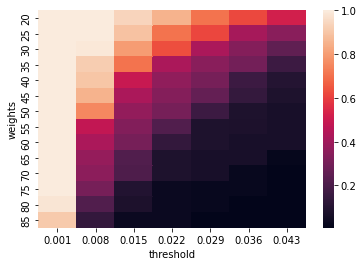

In [35]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# クラスの重みとしきい値を変化させた際の、Recallの変化

hm = result_df.pivot(index="weights",columns="threshold",values="recall")
sns.heatmap(hm)

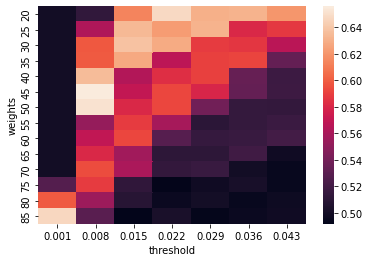

In [36]:
# クラスの重みとしきい値を変化させた際の、Balaced Accuracyの変化
hm = result_df.pivot(index="weights",columns="threshold",values="bal_ac")
sns.heatmap(hm)

色が白いところのほうがスコアが良い。


weightsが小さいほうが閾値が高くてもスコアが良いので
1（正例）の重みを大きくすることは効果がありそう。


（weightsが小さいほど 0の重みが小さく1の重みが大きい）

In [37]:
# 参考
# https://blog.amedama.jp/entry/imbalanced-data

# クラスの重みを設定
w=25         
weights = {
  0: w,
  1: 100-w,
}
#分類の閾値を設定
threshold = 0.015

clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight=weights)
clf.fit(X_train, Y_train)
predict = clf.predict_proba(X_test)
X_test_submit = X_test[["顧客ID","クーポンID"]]
X_test_submit["予測値"] = predict[:, 1:2]
submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

# 正解ファイルを読み込み、列数を取得
# ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
num  = len(ans.columns)

# 正解のデータフレームと予測のデータフレームをnumpy配列に変換
ans_array = ans.to_numpy()
submit_array = submit_pivot.to_numpy()

# 各ラベルにおけるloglossの平均値を計算
sum_logloss = 0
sum_bal_ac = 0
sum_recall = 0
sum_prec = 0
for i in range(num):
    sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
    sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
multi_log_loss = sum_logloss / num
multi_sum_bal_ac = sum_bal_ac / num
recall = sum_recall / num
precision = sum_prec / num

print("log loss          : %f" % multi_log_loss)
print("Balanced Accuracy : %f" % multi_sum_bal_ac)
print("recall: %f" % recall)
print("precision: %f" % precision)

log loss          : 0.073697
Balanced Accuracy : 0.634610
recall: 0.893506
precision: 0.017739


In [38]:
print("クーポンごとの実際に使われた回数")
print(sum(ans_array))
print("クーポンごとの使うと予測した回数")
print(sum((submit_array >= threshold).astype(int)))



クーポンごとの実際に使われた回数
[10  5  2  2  2  1  1 14  2  7  5]
クーポンごとの使うと予測した回数
[212 212 211 210 210 210 213 247 241 240 251]


In [39]:
pd.DataFrame(
    [
      sum(ans_array),
      sum((submit_array >= threshold).astype(int))
    ],
    columns=submit_pivot.columns, 
    index=
      ["クーポンごとの実際に使われた回数", # answer.csv
       "クーポンごとの使うと予測した回数"
       ]
)


クーポンID,1,2,3,4,5,6,7,8,9,10,11
クーポンごとの実際に使われた回数,10,5,2,2,2,1,1,14,2,7,5
クーポンごとの使うと予測した回数,212,212,211,210,210,210,213,247,241,240,251


使うと予測した数に対して実際に使われた回数は多くなっている（Recall重視）

### アンダーサンプリング、オーバーサンプリングで正例、負例の不均衡を低減

In [40]:
# 正/負例の数を保存
negative_count_train = (Y_train==0).sum()
positive_count_train = (Y_train==1).sum()
print('リサンプリング前の負例/正例比')
int(negative_count_train /positive_count_train )

リサンプリング前の負例/正例比


78

In [41]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from imblearn.under_sampling import RandomUnderSampler
# 参考 https://tekenuko.hatenablog.com/entry/2017/12/11/214522

# 負例/正例比を15に設定してあんだーさんぷりんぐ
sampler = RandomUnderSampler(sampling_strategy={0:positive_count_train*15, 1:positive_count_train}, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) # 一般的にはXは行列なので大文字,ｙはベクトルなので小文字

3916


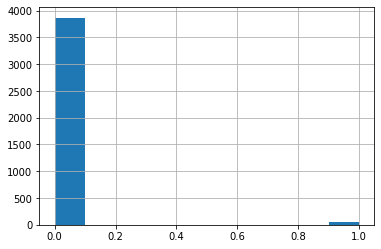

In [43]:
print(len(Y_train))
Y_train.hist()

784


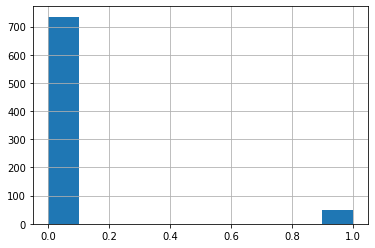

In [44]:
print(len(y_resampled))
y_resampled.hist()

SMOTEでオーバーサンプリング (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, Y_train)

3916


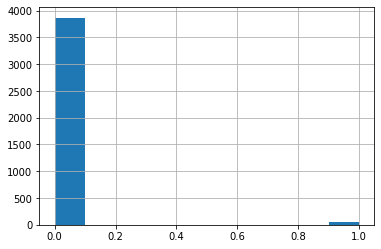

In [46]:
print(len(Y_train))
Y_train.hist()

7734


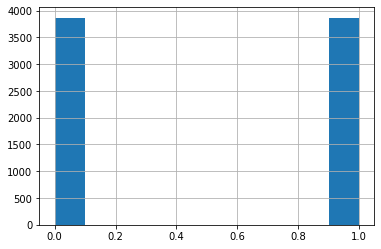

In [47]:
print(len(y_resampled))
y_resampled.hist()

In [48]:
results = [['sampling_rate','threshold','log_loss','bal_ac','recall','precision']]
# クラスの重みを設定
w=50        
weights = {
  0: w,
  1: 100-w,
}

for s in tqdm(range(5,75, 1)):
  sampler = SMOTE(sampling_strategy={0:negative_count_train, 1:int(negative_count_train /s)}, random_state=45)
  X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) 


  clf = RandomForestClassifier(max_depth=4, random_state=1,class_weight=weights)
  clf.fit(X_resampled, y_resampled)
  predict = clf.predict_proba(X_test)
  X_test_submit = X_test[["顧客ID","クーポンID"]]
  X_test_submit["予測値"] = predict[:, 1:2]
  submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

  # 正解ファイルを読み込み、列数を取得
  # ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
  ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
  num  = len(ans.columns)

  # 正解のデータフレームと予測のデータフレームをnumpy配列に変換
  ans_array = ans.to_numpy()
  submit_array = submit_pivot.to_numpy()

  # threshold = 0.01 #分類の閾値を設定
  for t in range (5, 50, 1):
    threshold = t/1000

    # 各ラベルにおけるloglossの平均値を計算
    sum_logloss = 0
    sum_bal_ac = 0
    sum_recall = 0
    sum_prec = 0
    for i in range(num):
        sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
        sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
        sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
        sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    multi_log_loss = sum_logloss / num
    multi_sum_bal_ac = sum_bal_ac / num
    recall = sum_recall / num
    precision = sum_prec / num
    results.append([s,threshold,multi_log_loss,multi_sum_bal_ac,recall,precision])

100%|██████████| 70/70 [03:06<00:00,  2.67s/it]


In [49]:
result_df = pd.DataFrame(results[1:], columns=results[0])
result_df.to_csv('sampling_results.csv')
# result_df = pd.read_csv('sampling_results.csv')

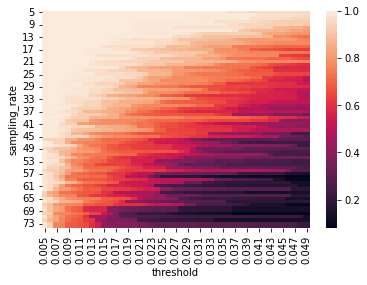

In [50]:
# 負例/正例のサンプル比としきい値を変化させた際のRecallの変化
hm = result_df.pivot(index="sampling_rate",columns="threshold",values="recall")
sns.heatmap(hm)

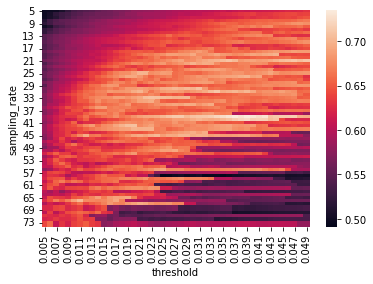

In [51]:
# サンプル比としきい値を変化させた際のBalaced Accuracyの変化
hm = result_df.pivot(index="sampling_rate",columns="threshold",values="bal_ac")
sns.heatmap(hm)

In [52]:
# クラスの重みを設定
w=50         
weights = {
  0: w,
  1: 100-w,
}

sampling_rate = 30
threshold = 0.023 #分類の閾値を設定

sampler = SMOTE(sampling_strategy={0:negative_count_train, 1:int(negative_count_train / sampling_rate)}, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) 

clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight=weights)
clf.fit(X_resampled, y_resampled)
predict = clf.predict_proba(X_test)
X_test_submit = X_test[["顧客ID","クーポンID"]]
X_test_submit["予測値"] = predict[:, 1:2]
submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

# 正解ファイルを読み込み、列数を取得
# ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
num  = len(ans.columns)

# 正解のデータフレームと予測のデータフレームをnumpy配列に変換
ans_array = ans.to_numpy()
submit_array = submit_pivot.to_numpy()

# 各ラベルにおけるloglossの平均値を計算
sum_logloss = 0
sum_bal_ac = 0
sum_recall = 0
sum_prec = 0
for i in range(num):
    sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
    sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
multi_log_loss = sum_logloss / num
multi_sum_bal_ac = sum_bal_ac / num
recall = sum_recall / num
precision = sum_prec / num

print("log loss          : %f" % multi_log_loss)
print("Balanced Accuracy : %f" % multi_sum_bal_ac)
print("recall: %f" % recall)
print("precision: %f" % precision)

log loss          : 0.077115
Balanced Accuracy : 0.661280
recall: 0.772727
precision: 0.021327


In [53]:
pd.DataFrame(
    [
      sum(ans_array),
      sum((submit_array >= threshold).astype(int))
    ],
    columns=submit_pivot.columns, 
    index=
      ["クーポンごとの実際に使われた回数", # answer.csv
       "クーポンごとの使うと予測した回数"
       ]
)

クーポンID,1,2,3,4,5,6,7,8,9,10,11
クーポンごとの実際に使われた回数,10,5,2,2,2,1,1,14,2,7,5
クーポンごとの使うと予測した回数,160,160,160,160,161,161,163,164,163,163,163


In [54]:

results = [['weights','sampling_rate','threshold','log_loss','bal_ac','recall','precision']]


for w in tqdm(range(10,50,2)):
    
  # 参考
  # https://blog.amedama.jp/entry/imbalanced-data
  weights = {
    0: w,
    1: 100-w,
  }


  for s in range(5,75, 1):
    sampler = SMOTE(sampling_strategy={0:negative_count_train, 1:int(negative_count_train /s)}, random_state=45)
    X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) 


    clf = RandomForestClassifier(max_depth=4, random_state=1,class_weight=weights)
    clf.fit(X_resampled, y_resampled)
    predict = clf.predict_proba(X_test)
    X_test_submit = X_test[["顧客ID","クーポンID"]]
    X_test_submit["予測値"] = predict[:, 1:2]
    submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

    # 正解ファイルを読み込み、列数を取得
    # ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
    ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
    num  = len(ans.columns)

    # 正解のデータフレームと予測のデータフレームをnumpy配列に変換
    ans_array = ans.to_numpy()
    submit_array = submit_pivot.to_numpy()

    # threshold = 0.01 #分類の閾値を設定
    for t in range (5, 100, 1):
      threshold = t/1000

      # 各ラベルにおけるloglossの平均値を計算
      sum_logloss = 0
      sum_bal_ac = 0
      sum_recall = 0
      sum_prec = 0
      for i in range(num):
          sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
          sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
          sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
          sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
      multi_log_loss = sum_logloss / num
      multi_sum_bal_ac = sum_bal_ac / num
      recall = sum_recall / num
      precision = sum_prec / num
      results.append([weights[0],s,threshold,multi_log_loss,multi_sum_bal_ac,recall,precision])

100%|██████████| 20/20 [1:31:39<00:00, 274.96s/it]


In [55]:
result_df = pd.DataFrame(results[1:], columns=results[0])
result_df.to_csv('results.csv')
# result_df = pd.read_csv('results.csv')
result_df

,weights,sampling_rate,threshold,log_loss,bal_ac,recall,precision
0,10,5,0.005,0.426591,0.500000,1.000000,0.013023
1,10,5,0.006,0.426591,0.502325,1.000000,0.013075
2,10,5,0.007,0.426591,0.504649,1.000000,0.013128
3,10,5,0.008,0.426591,0.509820,1.000000,0.013256
4,10,5,0.009,0.426591,0.518099,1.000000,0.013477
...,...,...,...,...,...,...,...
132995,48,74,0.095,0.066722,0.507937,0.025974,0.048485
132996,48,74,0.096,0.066722,0.508068,0.025974,0.048485
132997,48,74,0.097,0.066722,0.504821,0.019481,0.036364
132998,48,74,0.098,0.066722,0.505084,0.019481,0.040909


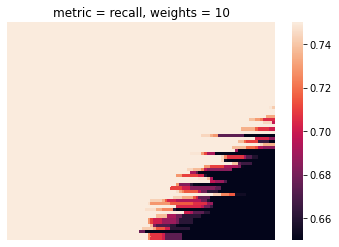

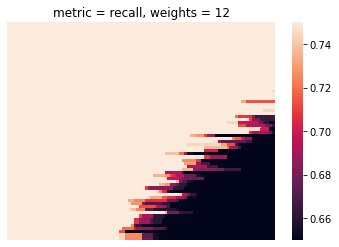

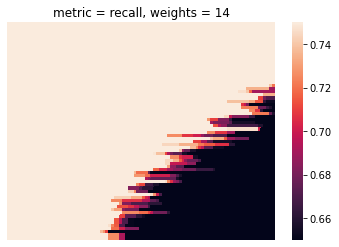

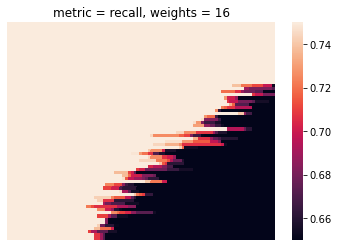

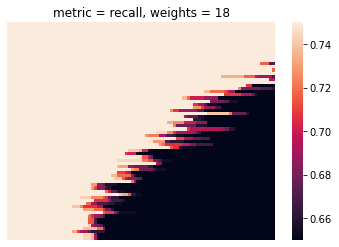

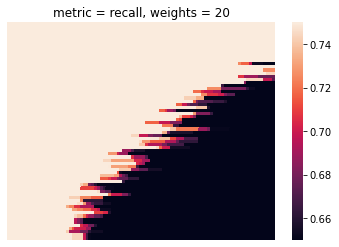

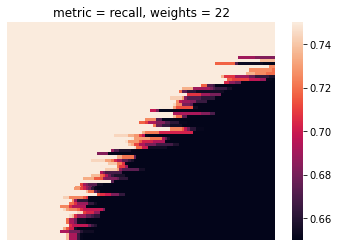

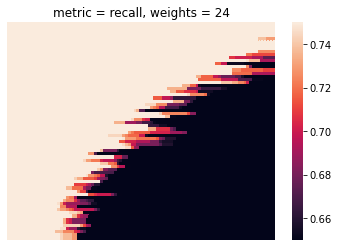

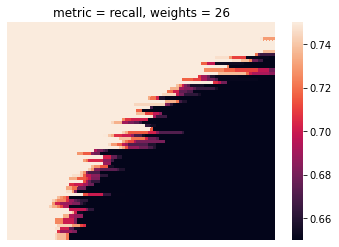

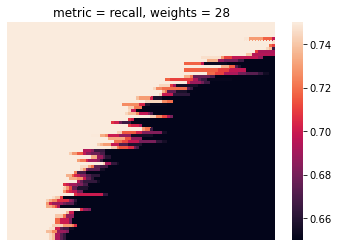

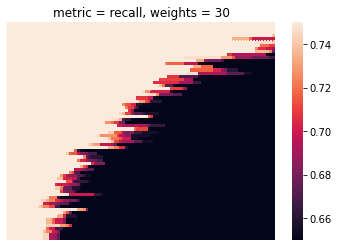

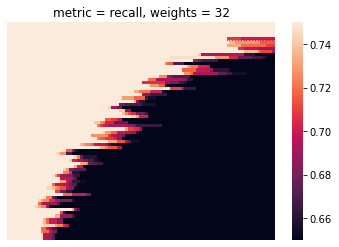

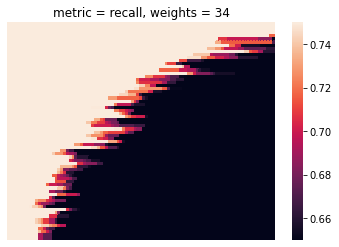

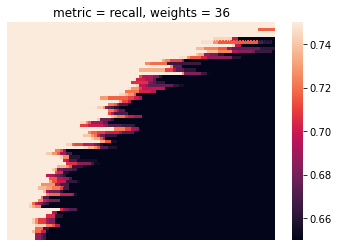

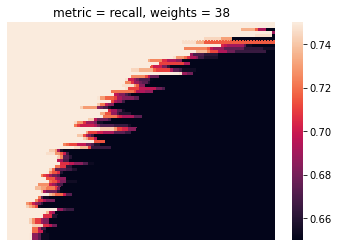

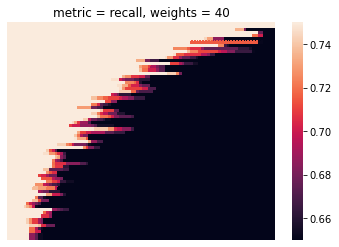

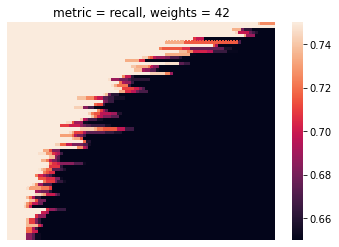

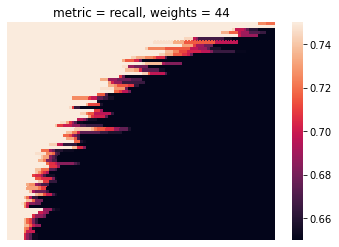

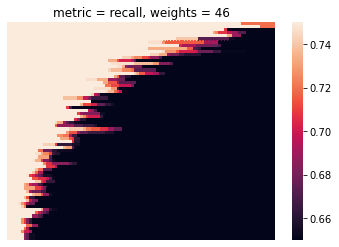

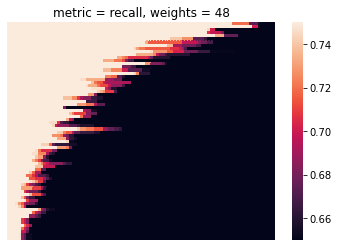

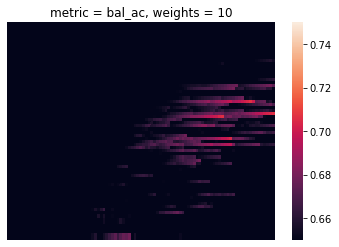

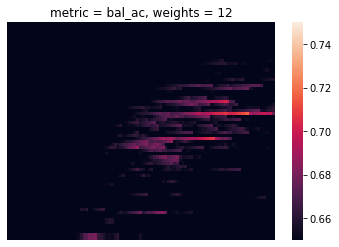

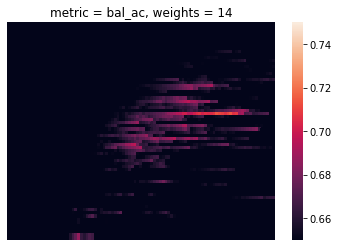

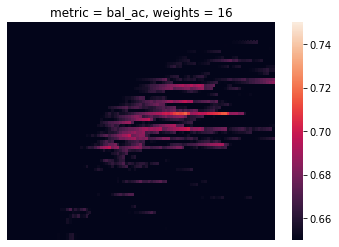

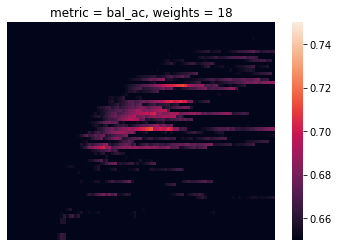

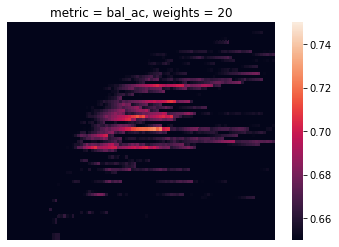

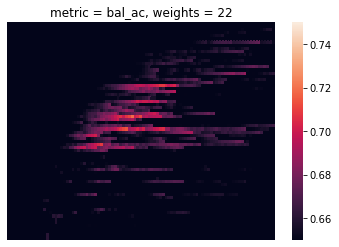

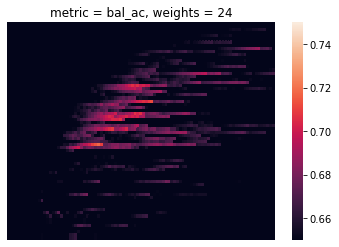

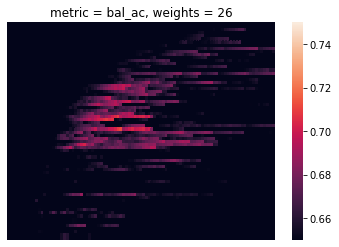

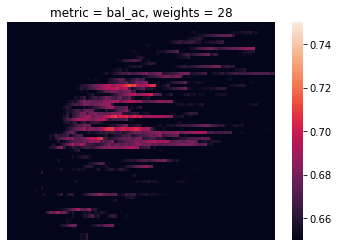

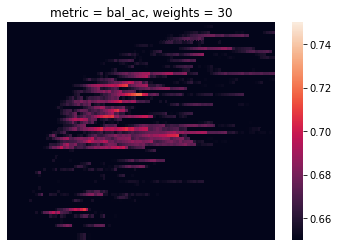

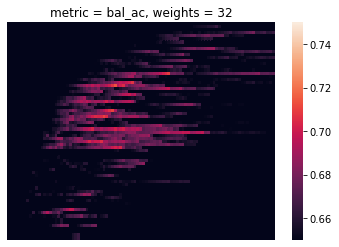

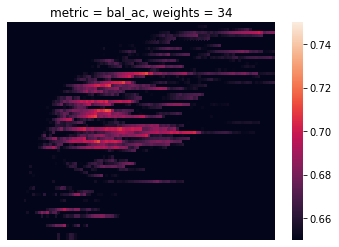

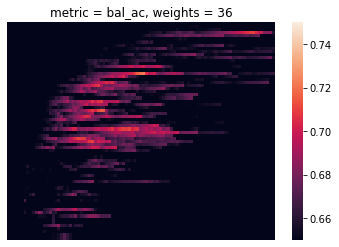

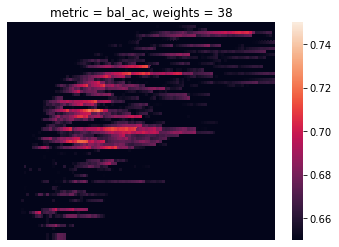

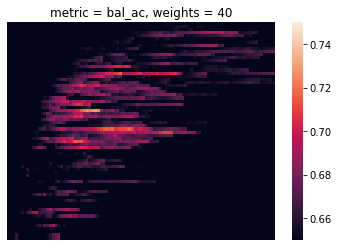

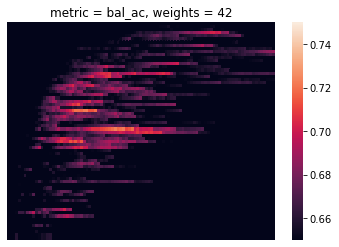

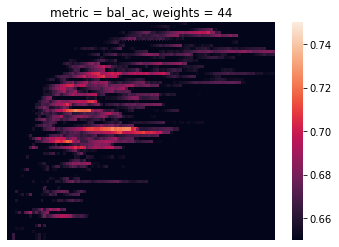

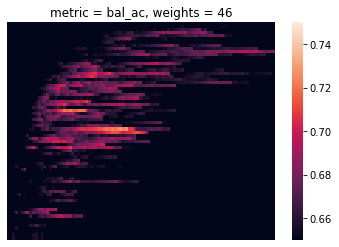

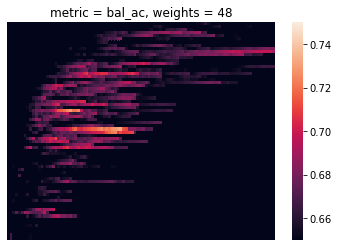

In [56]:
for metric in ['recall','bal_ac']:
    for w in result_df.weights.unique():
      plt.figure()
      plt.title(f"metric = {metric}, weights = {w}")
      hm = result_df.loc[result_df.weights == w].pivot(index="sampling_rate",columns="threshold",values=metric)
      sns.heatmap(hm,vmin=0.65, vmax=0.75)

      plt.axis("off")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)

feature_names = list(X_train.columns)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
forest_importances

In [57]:
results = [['threshold','log_loss','bal_ac','recall','precision']]


# クラスの重みを設定
w=40         
weights = {
  0: w,
  1: 100-w,
}

sampling_rate = 30
threshold = 0.04 #分類の閾値を設定

sampler = SMOTE(sampling_strategy={0:negative_count_train, 1:int(negative_count_train / sampling_rate)}, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) 

clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight=weights)
clf.fit(X_resampled, y_resampled)
predict = clf.predict_proba(X_test)
X_test_submit = X_test[["顧客ID","クーポンID"]]
X_test_submit["予測値"] = predict[:, 1:2]
submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

# 正解ファイルを読み込み、列数を取得
# ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
num  = len(ans.columns)

# 正解のデータフレームと予測のデータフレームをnumpy配列に変換
ans_array = ans.to_numpy()
submit_array = submit_pivot.to_numpy()


# threshold = 0.01 #分類の閾値を設定
for t in range (5, 100, 1):
  threshold = t/1000

  # 各ラベルにおけるloglossの平均値を計算
  sum_logloss = 0
  sum_bal_ac = 0
  sum_recall = 0
  sum_prec = 0
  for i in range(num):
      sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
      sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
      sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
      sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
  multi_log_loss = sum_logloss / num
  multi_sum_bal_ac = sum_bal_ac / num
  recall = sum_recall / num
  precision = sum_prec / num
  results.append([threshold,multi_log_loss,multi_sum_bal_ac,recall,precision])


  # print("log loss          : %f" % multi_log_loss)
  # print(threshold)
  # print("Balanced Accuracy : %f" % multi_sum_bal_ac)
  # print("recall: %f" % recall)
  # print("precision: %f" % precision)

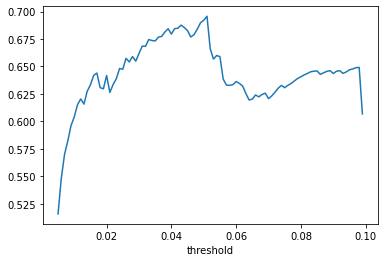

In [58]:
result_df = pd.DataFrame(results[1:], columns=results[0])
result_df.groupby('threshold').mean()['bal_ac'].plot()


In [59]:
results = [['threshold','log_loss','bal_ac','recall','precision']]


# クラスの重みを設定
w=40         
weights = {
  0: w,
  1: 100-w,
}

sampling_rate = 30
threshold = 0.05 #分類の閾値を設定

sampler = SMOTE(sampling_strategy={0:negative_count_train, 1:int(negative_count_train / sampling_rate)}, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X_train, Y_train) 

clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight=weights)
clf.fit(X_resampled, y_resampled)
predict = clf.predict_proba(X_test)
X_test_submit = X_test[["顧客ID","クーポンID"]]
X_test_submit["予測値"] = predict[:, 1:2]
submit_pivot = X_test_submit.pivot(index="顧客ID",columns="クーポンID",values="予測値")

# 正解ファイルを読み込み、列数を取得
# ansはy_testに相当するもの（y_trainとは形状が異なるためy_testという変数名は使用していない）
ans = pd.read_csv(dataset_path + 'answer.csv', index_col = 0, header = None)
num  = len(ans.columns)

# 正解のデータフレームと予測のデータフレームをnumpy配列に変換
ans_array = ans.to_numpy()
submit_array = submit_pivot.to_numpy()

# 各ラベルにおけるloglossの平均値を計算
sum_logloss = 0
sum_bal_ac = 0
sum_recall = 0
sum_prec = 0
for i in range(num):
    sum_logloss += log_loss(ans_array[:,i],submit_array[:,i])
    sum_bal_ac += balanced_accuracy_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_recall += recall_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
    sum_prec += precision_score( ans_array[:,i], (submit_array[:,i] >= threshold).astype(int) )
multi_log_loss = sum_logloss / num
multi_sum_bal_ac = sum_bal_ac / num
recall = sum_recall / num
precision = sum_prec / num

print("log loss          : %f" % multi_log_loss)
print("Balanced Accuracy : %f" % multi_sum_bal_ac)
print("recall: %f" % recall)
print("precision: %f" % precision)

log loss          : 0.083986
Balanced Accuracy : 0.692095
recall: 0.672727
precision: 0.025847


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe96301f710>]],
      dtype=object)

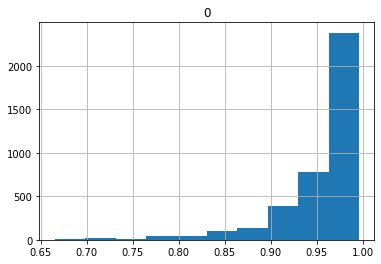

In [60]:
pd.DataFrame(predict[:,0]).hist()

In [61]:
pd.DataFrame(
    [
      sum(ans_array),
      sum((submit_array >= threshold).astype(int))
    ],
    columns=submit_pivot.columns, 
    index=
      ["クーポンごとの実際に使われた回数", # answer.csv
       "クーポンごとの使うと予測した回数"
       ]
)

クーポンID,1,2,3,4,5,6,7,8,9,10,11
クーポンごとの実際に使われた回数,10,5,2,2,2,1,1,14,2,7,5
クーポンごとの使うと予測した回数,99,99,99,99,99,99,100,113,113,112,113


In [62]:
merge.loc['']

NameError: ignored

In [ ]:
merge_train.loc[merge_train['クーポン利用']==1]